<a href="https://colab.research.google.com/github/rmhanna/Randa/blob/main/Student%20Grade%20Data%20Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 3.2: Practice with Data Cleaning*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%203/Notebook3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Exercise I. Load the following datafile from GitHub

In [ ]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")

In [ ]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


In [ ]:


# Display the first few rows
print(grads.head())
print(grads.tail())
print("\n The maximum GPA:", grads["GPA"].max())
print("\n The minimum GPA:", grads["GPA"].min())
print("\n The average GPA:", grads["GPA"].mean())
print("\n The median GPA:", grads["GPA"].median())

  Student Name  Avg Hours Studies per Week  GPA    University  \
0       George                          20  NaN           NYU   
1        Jerry                          35  3.5      Columbia   
2       Elaine                          55  4.0      Columbia   
3        Cosmo                           5  2.0  City College   
4       Newman                          25  2.8  City College   

   Sense of Humour (0-5) Salary  
0                    3.0   $40k  
1                    5.0   $80k  
2                    4.2   $60k  
3                    2.0   $25k  
4                    0.0   $50k  
  Student Name  Avg Hours Studies per Week  GPA     University  \
4       Newman                          25  2.8   City College   
5        Frank                          35  3.0   Festivus Uni   
6      Estelle                         100  3.2  Festivus Uni    
7          Leo                          15  2.4   Festivus Uni   
8       Rachel                          50  4.0       Columbia   

   Sense

Question 1: Identify all the outliers in the above data.  Justify your answers using objective measures.


=== Outlier Detection using IQR ===

Column: Avg Hours Studies per Week
IQR bounds: -25.000 to 95.000
Outliers (Student Name, value):
Student Name  Avg Hours Studies per Week
     Estelle                         100

Column: GPA
IQR bounds: 1.750 to 4.550
No outliers by IQR.

Column: Sense of Humour (0-5)
IQR bounds: -0.250 to 4.950
Outliers (Student Name, value):
Student Name  Sense of Humour (0-5)
       Jerry                    5.0

Column: Salary
IQR bounds: 10000.000 to 90000.000
No outliers by IQR.

=== Outlier Detection using Z-Score (|z| >= 3) ===

Column: Avg Hours Studies per Week
Mean: 37.778 | Std: 28.297
No outliers by Z-Score.

Column: GPA
Mean: 3.112 | Std: 0.670
No outliers by Z-Score.

Column: Sense of Humour (0-5)
Mean: 2.271 | Std: 1.674
No outliers by Z-Score.

Column: Salary
Mean: 49444.444 | Std: 18615.257
No outliers by Z-Score.

=== Saved outlier report to: outliers_report.csv ===


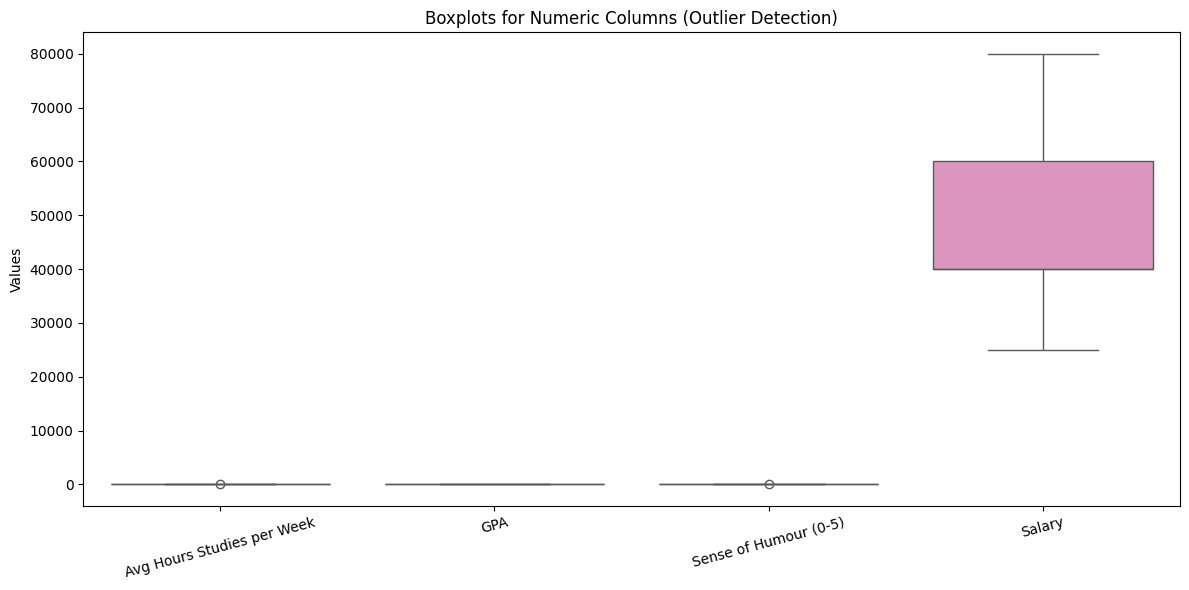

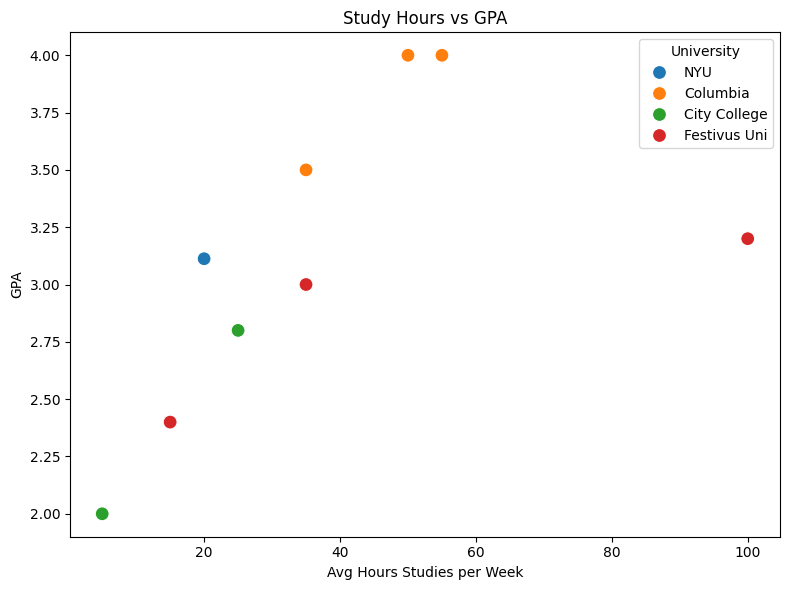

In [3]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load the data correctly from GitHub (raw link)

url = "https://raw.githubusercontent.com/rmhanna/Randa/main/cleaned_grade.csv"


grads = pd.read_csv(url)

# 2) Numeric columns (ensure they’re numeric)

numeric_cols = ['Avg Hours Studies per Week', 'GPA', 'Sense of Humour (0-5)', 'Salary']

for col in numeric_cols:
    grads[col] = pd.to_numeric(grads[col], errors='coerce')

# 3) Outlier detection with IQR (Tukey fences)

iqr_outliers_dict = {}

print("\n=== Outlier Detection using IQR ===")
for col in numeric_cols:
    Q1 = grads[col].quantile(0.25)
    Q3 = grads[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = grads[(grads[col] < lower_bound) | (grads[col] > upper_bound)]
    iqr_outliers_dict[col] = outliers_iqr

    print(f"\nColumn: {col}")
    print(f"IQR bounds: {lower_bound:.3f} to {upper_bound:.3f}")
    if outliers_iqr.empty:
        print("No outliers by IQR.")
    else:
        print("Outliers (Student Name, value):")
        print(outliers_iqr[['Student Name', col]].to_string(index=False))


# 4) Outlier detection with Z-Score (|z| >= 3)

zscore_outliers_dict = {}
print("\n=== Outlier Detection using Z-Score (|z| >= 3) ===")
for col in numeric_cols:
    col_mean = grads[col].mean(skipna=True)
    col_std = grads[col].std(skipna=True)

    if pd.isna(col_std) or col_std == 0:
        print(f"\nColumn: {col}")
        print("Std. deviation is zero or unavailable—cannot compute Z-Score.")
        zscore_outliers_dict[col] = grads.iloc[0:0]
        continue

    z = (grads[col] - col_mean) / col_std
    outliers_z = grads[np.abs(z) >= 3]
    zscore_outliers_dict[col] = outliers_z

    print(f"\nColumn: {col}")
    print(f"Mean: {col_mean:.3f} | Std: {col_std:.3f}")
    if outliers_z.empty:
        print("No outliers by Z-Score.")
    else:
        print("Outliers (Student Name, value, z):")
        temp = grads.loc[np.abs(z) >= 3, ['Student Name', col]].copy()
        temp['z'] = z[np.abs(z) >= 3].round(3)
        print(temp.to_string(index=False))


# 5) Combine results and save to CSV

rows = []
for col in numeric_cols:
    # IQR
    if not iqr_outliers_dict[col].empty:
        for _, r in iqr_outliers_dict[col].iterrows():
            rows.append({
                'Method': 'IQR',
                'Column': col,
                'Student Name': r.get('Student Name', np.nan),
                'Value': r[col]
            })
    # Z-Score
    if not zscore_outliers_dict[col].empty:
        col_mean = grads[col].mean(skipna=True)
        col_std = grads[col].std(skipna=True)
        z = (grads[col] - col_mean) / (col_std if col_std else np.nan)
        sel = grads.index.isin(zscore_outliers_dict[col].index)
        for idx in grads.index[sel]:
            rows.append({
                'Method': 'Z-Score(|z|>=3)',
                'Column': col,
                'Student Name': grads.at[idx, 'Student Name'] if 'Student Name' in grads.columns else np.nan,
                'Value': grads.at[idx, col],
                'z': round(z.at[idx], 3) if pd.notna(z.at[idx]) else np.nan
            })

outliers_all = pd.DataFrame(rows)
outliers_all.to_csv('outliers_report.csv', index=False)
print("\n=== Saved outlier report to: outliers_report.csv ===")


# 6) Boxplots for numeric columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=grads[numeric_cols], palette='Set2')
plt.title('Boxplots for Numeric Columns (Outlier Detection)')
plt.ylabel('Values')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 7) Scatter plot: Study Hours vs GPA

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Avg Hours Studies per Week',
    y='GPA',
    data=grads,
    hue='University' if 'University' in grads.columns else None,
    s=100
)
plt.title('Study Hours vs GPA')
plt.xlabel('Avg Hours Studies per Week')
plt.ylabel('GPA')
plt.legend(title='University', loc='best')
plt.tight_layout()
plt.show()

# New section

Question 2: There are various data that are missing.  Fill-in the missing data or delete the rows/columns that you think you should delete.  Justify your answer

Question 3: Reload the data and fill-in the data using mean method as well as the frequent method.

Exercise II. Run the cell below to create a new dataframe called `df_miss`.  Its first column will contain some missing values.

In [ ]:
import pandas as pd
import numpy as np
import random

nrows = 10
ncols = 5

# set a seed for random number generation
np.random.seed(314)
# create an array filled with random data
data = np.array(np.random.rand(nrows, ncols))
# put the data to a pandas dataframe
df_miss = pd.DataFrame(data)
# rename the columns
df_miss.columns = ['col_'+str(ii) for ii in range(ncols)]

# randomly set some values to missing
ix0 = np.random.randint(nrows, size=3)
ix1 = np.random.randint(nrows, size=3)

df_miss['col_0'][ix0] = np.nan
df_miss['col_1'][ix1] = np.nan

print(df_miss)

Impute the missing values (NaN) in `col_0` (but not `col_1`) with the median.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [5]:
import pandas as pd

# Load the dataset from GitHub raw link
url = "https://raw.githubusercontent.com/rmhanna/Randa/main/cleaned_grade.csv"
df = pd.read_csv(url)

# Treat 'Avg Hours Studies per Week' as col_0
median_val = df['Avg Hours Studies per Week'].median()

# Impute NaN values in col_0 with median using inplace=True
df['Avg Hours Studies per Week'].fillna(median_val, inplace=True)

# Print the updated DataFrame
print(df)


  Student Name  Avg Hours Studies per Week     GPA    University  \
0       George                          20  3.1125           NYU   
1        Jerry                          35  3.5000      Columbia   
2       Elaine                          55  4.0000      Columbia   
3        Cosmo                           5  2.0000  City College   
4       Newman                          25  2.8000  City College   
5        Frank                          35  3.0000  Festivus Uni   
6      Estelle                         100  3.2000  Festivus Uni   
7          Leo                          15  2.4000  Festivus Uni   
8       Rachel                          50  4.0000      Columbia   

   Sense of Humour (0-5)   Salary  
0               3.000000  40000.0  
1               5.000000  80000.0  
2               4.200000  60000.0  
3               2.000000  25000.0  
4               0.000000  50000.0  
5               2.271429  40000.0  
6               1.700000  40000.0  
7               0.000000  35000

/tmp/ipython-input-1953899738.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg Hours Studies per Week'].fillna(median_val, inplace=True)


Impute the missing values in `col_1` with value 0.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [1]:
import pandas as pd

# Load the dataset from GitHub raw link
url = "https://raw.githubusercontent.com/rmhanna/Randa/main/cleaned_grade.csv"
df = pd.read_csv(url)

# Step 1: Impute NaN in col_0 (Avg Hours Studies per Week) with median
median_val = df['Avg Hours Studies per Week'].median()
df['Avg Hours Studies per Week'].fillna(median_val, inplace=True)

# Step 2: Impute NaN in col_1 (GPA) with 0
df['GPA'].fillna(0, inplace=True)

# Print the updated DataFrame
print(df)

  Student Name  Avg Hours Studies per Week     GPA    University  \
0       George                          20  3.1125           NYU   
1        Jerry                          35  3.5000      Columbia   
2       Elaine                          55  4.0000      Columbia   
3        Cosmo                           5  2.0000  City College   
4       Newman                          25  2.8000  City College   
5        Frank                          35  3.0000  Festivus Uni   
6      Estelle                         100  3.2000  Festivus Uni   
7          Leo                          15  2.4000  Festivus Uni   
8       Rachel                          50  4.0000      Columbia   

   Sense of Humour (0-5)   Salary  
0               3.000000  40000.0  
1               5.000000  80000.0  
2               4.200000  60000.0  
3               2.000000  25000.0  
4               0.000000  50000.0  
5               2.271429  40000.0  
6               1.700000  40000.0  
7               0.000000  35000

/tmp/ipython-input-3254401708.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg Hours Studies per Week'].fillna(median_val, inplace=True)
/tmp/ipython-input-3254401708.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [3]:
display(df.describe())

,Avg Hours Studies per Week,GPA,Sense of Humour (0-5),Salary
count,9.000000,9.000000,9.000000,9.000000
mean,37.777778,3.112500,2.271429,49444.444444
std,28.296545,0.669771,1.673854,18615.256586
min,5.000000,2.000000,0.000000,25000.000000
25%,20.000000,2.800000,1.700000,40000.000000
50%,35.000000,3.112500,2.271429,40000.000000
75%,50.000000,3.500000,3.000000,60000.000000
max,100.000000,4.000000,5.000000,80000.000000


from matplotlib import pyplot as plt
_df_0['Avg Hours Studies per Week'].plot(kind='hist', bins=20, title='Avg Hours Studies per Week')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['GPA'].plot(kind='hist', bins=20, title='GPA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sense of Humour (0-5)'].plot(kind='hist', bins=20, title='Sense of Humour (0-5)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Salary'].plot(kind='hist', bins=20, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Avg Hours Studies per Week', y='GPA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='GPA', y='Sense of Humour (0-5)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Sense of Humour (0-5)', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Avg Hours Studies per Week'].plot(kind='line', figsize=(8, 4), title='Avg Hours Studies per Week')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['GPA'].plot(kind='line', figsize=(8, 4), title='GPA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Sense of Humour (0-5)'].plot(kind='line', figsize=(8, 4), title='Sense of Humour (0-5)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Salary'].plot(kind='line', figsize=(8, 4), title='Salary')
plt.gca().spines[['top', 'right']].set_visible(False)